###  목표
- IMDb 영화 리뷰 데이터 The Internet Movie Database의 약자
- 자연어 전처리 과정을 실습
- 영화리뷰데이터를 통한 감성분석 진행

In [1]:
# 라이브러리
import nltk
nltk.download('all') # nltk에 있는 모든 라이브러리 다운로드

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\SMHRD\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\SMHRD\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\SMHRD\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\SMHRD\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\SMHRD\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\bas

[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\SMHRD\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nonbreaking_prefixes.zip.
[nltk_data]    | Downloading package nps_chat to
[nltk_data]    |     C:\Users\SMHRD\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nps_chat.zip.
[nltk_data]    | Downloading package omw to
[nltk_data]    |     C:\Users\SMHRD\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package omw-1.4 to
[nltk_data]    |     C:\Users\SMHRD\AppData\Roaming\nltk_data...
[nltk_data]    |   Package omw-1.4 is already up-to-date!
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     C:\Users\SMHRD\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\opinion_lexicon.zip.
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\SMHRD\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package paradigms to
[nltk_data]    | 

[nltk_data]    | Downloading package verbnet3 to
[nltk_data]    |     C:\Users\SMHRD\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\verbnet3.zip.
[nltk_data]    | Downloading package webtext to
[nltk_data]    |     C:\Users\SMHRD\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\webtext.zip.
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\SMHRD\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\wmt15_eval.zip.
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\SMHRD\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\word2vec_sample.zip.
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     C:\Users\SMHRD\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet is already up-to-date!
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     C:\Users\SMHRD\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package w

True

In [25]:
import pandas as pd
# 토큰화 필요한 함수 호출
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

# 단어 빈도 계산에 사용할 Counter() 함수 호출
from collections import Counter # 단어의 빈도수를 세어주는 함수
from nltk.corpus import stopwords # 불용어 관련 함수
from preprocessing import *
# from preprocessing import pos_tagger -> 품사태깅 에 필요

In [7]:
# 데이터 불러오기
# .tsv(tab으로구분된파일) -> delimiter(구분자) 속성을 \t (tab)으로 지정
df = pd.read_csv("imdb.tsv", delimiter='\t')
df

,Unnamed: 0,review
0,0,"Watching Time Chasers, it obvious that it was ..."
1,1,I saw this film about 20 years ago and remembe...
2,2,"Minor Spoilers In New York, Joan Barnard (Elvi..."
3,3,I went to see this film with a great deal of e...
4,4,"Yes, I agree with everyone on this site this m..."
5,5,"Jennifer Ehle was sparkling in \""Pride and Pre..."
6,6,Amy Poehler is a terrific comedian on Saturday...
7,7,A plane carrying employees of a large biotech ...
8,8,"A well made, gritty science fiction movie, it ..."
9,9,Incredibly dumb and utterly predictable story ...


### 대소문자 통합

In [11]:
# 소문자로 변환 -> .lower()
# 중요 ) .lower : "문자열 형태" 만 소문자로 변환해줄수 있음
# df['review']: (시리즈형태) -> 문자열 형태로 : .str
df['review'] = df['review'].str.lower()

In [12]:
df

,Unnamed: 0,review
0,0,"watching time chasers, it obvious that it was ..."
1,1,i saw this film about 20 years ago and remembe...
2,2,"minor spoilers in new york, joan barnard (elvi..."
3,3,i went to see this film with a great deal of e...
4,4,"yes, i agree with everyone on this site this m..."
5,5,"jennifer ehle was sparkling in \""pride and pre..."
6,6,amy poehler is a terrific comedian on saturday...
7,7,a plane carrying employees of a large biotech ...
8,8,"a well made, gritty science fiction movie, it ..."
9,9,incredibly dumb and utterly predictable story ...


### 단어토큰화

In [14]:
# 전체 코퍼스를 단어로 토큰화한 후 'word_tokens'라는 컬럼을 생성하기
# word_tokenize 함수 사용
# df : (데이터프레임형태) , df['review'] : (시리즈형태)
# 중요 ) 데이터프레임 / 시리즈 형태에서 함수를 사용 -> .apply 메서드 사용!!
## 1. df에서 review 컬럼 접근
## 2. apply 메서드 사용해서 word_tokenize 함수 사용
## 3. word_tokens라는 컬럼을 생성하여 값 담아주기
df['word_tokens'] = df['review'].apply(word_tokenize)
df

,Unnamed: 0,review,word_tokens
0,0,"watching time chasers, it obvious that it was ...","[watching, time, chasers, ,, it, obvious, that..."
1,1,i saw this film about 20 years ago and remembe...,"[i, saw, this, film, about, 20, years, ago, an..."
2,2,"minor spoilers in new york, joan barnard (elvi...","[minor, spoilers, in, new, york, ,, joan, barn..."
3,3,i went to see this film with a great deal of e...,"[i, went, to, see, this, film, with, a, great,..."
4,4,"yes, i agree with everyone on this site this m...","[yes, ,, i, agree, with, everyone, on, this, s..."
5,5,"jennifer ehle was sparkling in \""pride and pre...","[jennifer, ehle, was, sparkling, in, \, '', pr..."
6,6,amy poehler is a terrific comedian on saturday...,"[amy, poehler, is, a, terrific, comedian, on, ..."
7,7,a plane carrying employees of a large biotech ...,"[a, plane, carrying, employees, of, a, large, ..."
8,8,"a well made, gritty science fiction movie, it ...","[a, well, made, ,, gritty, science, fiction, m..."
9,9,incredibly dumb and utterly predictable story ...,"[incredibly, dumb, and, utterly, predictable, ..."


### 데이터 정제
- 등장빈도, 단어길이, 불용어 세트를 사용하여 데이터 정제

In [17]:
# 파이썬 모듈 파일이 중간에 수정되면 해당 내용이 자동으로 반영되도록 하는 함수
## preprocessing.py를 중간에 수정했던 상황이였음
%load_ext autoreload
%autoreload 2

#### 람다함수 사용법

In [15]:
# 함수 정의
def plus(a,b) :
    return a+b

In [16]:
# 람다 함수 사용법
lambda x, y : x+y

<function __main__.<lambda>(x, y)>

df['cleaned_words']=df['word_tokens'].apply(lambda x: clean_by_freq(x,1)) 

In [ ]:
# df['cleaned_words']=df['word_tokens'].apply(lambda x: clean_by_freq(x,1)) 
# -> x에 df['word_tokens'] 의 행을 순서대로 넣음

In [21]:
# preprocession.py 에 정의된 함수
## 빈도수에 따른 데이터 정제 함수 : clean_by_freq
## 단어길이에 따른 데이터 정제 함수 : clean_by_len
## 불용어 세트를 활용한 정제 함수 : clean_by_stopwords

# 빈도수 정제 함수 사용 후 재대입
df['cleaned_words']=df['word_tokens'].apply(lambda x: clean_by_freq(x,1)) 
# 단어길이(길이 = 2) 정제 함수 사용 후 재대입
df['cleaned_words']=df['cleaned_words'].apply(lambda x:clean_by_len(x,2))
# 불용어 세트를 활용한 정제 함수 사용 후 재대입
stopwords_set = stopwords.words('english')
df['cleaned_words']=df['cleaned_words'].apply(lambda x:clean_by_stopwords(x,stopwords_set))


,Unnamed: 0,review,word_tokens,cleaned_words
0,0,"watching time chasers, it obvious that it was ...","[watching, time, chasers, ,, it, obvious, that...","[one, film, said, '', 's, really, bad, movie, ..."
1,1,i saw this film about 20 years ago and remembe...,"[i, saw, this, film, about, 20, years, ago, an...","[film, film]"
2,2,"minor spoilers in new york, joan barnard (elvi...","[minor, spoilers, in, new, york, ,, joan, barn...","[new, york, joan, barnard, elvire, audrey, bar..."
3,3,i went to see this film with a great deal of e...,"[i, went, to, see, this, film, with, a, great,...","[went, film, film, 's, went, 's, jump, send, n..."
4,4,"yes, i agree with everyone on this site this m...","[yes, ,, i, agree, with, everyone, on, this, s...","[site, movie, bad, even, movie, made, 's, movi..."
5,5,"jennifer ehle was sparkling in \""pride and pre...","[jennifer, ehle, was, sparkling, in, \, '', pr...","[ehle, '', '', northam, wonderful, '', '', won..."
6,6,amy poehler is a terrific comedian on saturday...,"[amy, poehler, is, a, terrific, comedian, on, ...","[role, movie, n't, 's, author, book, author, '..."
7,7,a plane carrying employees of a large biotech ...,"[a, plane, carrying, employees, of, a, large, ...","[plane, --, ceo, 's, --, search, rescue, missi..."
8,8,"a well made, gritty science fiction movie, it ...","[a, well, made, ,, gritty, science, fiction, m...","[gritty, movie, sci-fi, good, suspense, movie,..."
9,9,incredibly dumb and utterly predictable story ...,"[incredibly, dumb, and, utterly, predictable, ...","[girl, girl, '', '', --, --, '', '', '', '']"


### 어간추출

In [ ]:
# stemming_by_porter 함수 적용하기
# cleaned_words 컬럼값에 함수 적용
df['stemmed_tokens']=df['cleaned_words'].apply(stemming_by_porter) 
# 여기서는 들어가는 매개변수가 1개라서 lambda 안써도됨 알아서 행값이 하나씩 들어가기 때문

In [24]:
# 문장토큰화 진행
# 항상 시리즈 / 데이터프레임 형태에 우리가 만든 함수 적용할때에는 .apply!
# sent_tokenize 함수 적용
# 'sent_tokens' 라는 컬럼 생성

df['sent_tokens']=df['review'].apply(sent_tokenize)
df

,Unnamed: 0,review,word_tokens,cleaned_words,sent_tokens
0,0,"watching time chasers, it obvious that it was ...","[watching, time, chasers, ,, it, obvious, that...","[one, film, said, '', 's, really, bad, movie, ...","[watching time chasers, it obvious that it was..."
1,1,i saw this film about 20 years ago and remembe...,"[i, saw, this, film, about, 20, years, ago, an...","[film, film]",[i saw this film about 20 years ago and rememb...
2,2,"minor spoilers in new york, joan barnard (elvi...","[minor, spoilers, in, new, york, ,, joan, barn...","[new, york, joan, barnard, elvire, audrey, bar...","[minor spoilers in new york, joan barnard (elv..."
3,3,i went to see this film with a great deal of e...,"[i, went, to, see, this, film, with, a, great,...","[went, film, film, 's, went, 's, jump, send, n...",[i went to see this film with a great deal of ...
4,4,"yes, i agree with everyone on this site this m...","[yes, ,, i, agree, with, everyone, on, this, s...","[site, movie, bad, even, movie, made, 's, movi...","[yes, i agree with everyone on this site this ..."
5,5,"jennifer ehle was sparkling in \""pride and pre...","[jennifer, ehle, was, sparkling, in, \, '', pr...","[ehle, '', '', northam, wonderful, '', '', won...","[jennifer ehle was sparkling in \""pride and pr..."
6,6,amy poehler is a terrific comedian on saturday...,"[amy, poehler, is, a, terrific, comedian, on, ...","[role, movie, n't, 's, author, book, author, '...",[amy poehler is a terrific comedian on saturda...
7,7,a plane carrying employees of a large biotech ...,"[a, plane, carrying, employees, of, a, large, ...","[plane, --, ceo, 's, --, search, rescue, missi...",[a plane carrying employees of a large biotech...
8,8,"a well made, gritty science fiction movie, it ...","[a, well, made, ,, gritty, science, fiction, m...","[gritty, movie, sci-fi, good, suspense, movie,...","[a well made, gritty science fiction movie, it..."
9,9,incredibly dumb and utterly predictable story ...,"[incredibly, dumb, and, utterly, predictable, ...","[girl, girl, '', '', --, --, '', '', '', '']",[incredibly dumb and utterly predictable story...


### 품사 태깅

In [26]:
# pos_tagger 함수 사용하여 'sent_tokens' 컬럼에 적용

df['pos_tagged_tokens']=df['sent_tokens'].apply(pos_tagger)
df

,Unnamed: 0,review,word_tokens,cleaned_words,sent_tokens,pos_tagged_tokens
0,0,"watching time chasers, it obvious that it was ...","[watching, time, chasers, ,, it, obvious, that...","[one, film, said, '', 's, really, bad, movie, ...","[watching time chasers, it obvious that it was...","[(watching, VBG), (time, NN), (chasers, NNS), ..."
1,1,i saw this film about 20 years ago and remembe...,"[i, saw, this, film, about, 20, years, ago, an...","[film, film]",[i saw this film about 20 years ago and rememb...,"[(i, NN), (saw, VBD), (this, DT), (film, NN), ..."
2,2,"minor spoilers in new york, joan barnard (elvi...","[minor, spoilers, in, new, york, ,, joan, barn...","[new, york, joan, barnard, elvire, audrey, bar...","[minor spoilers in new york, joan barnard (elv...","[(minor, JJ), (spoilers, NNS), (in, IN), (new,..."
3,3,i went to see this film with a great deal of e...,"[i, went, to, see, this, film, with, a, great,...","[went, film, film, 's, went, 's, jump, send, n...",[i went to see this film with a great deal of ...,"[(i, JJ), (went, VBD), (to, TO), (see, VB), (t..."
4,4,"yes, i agree with everyone on this site this m...","[yes, ,, i, agree, with, everyone, on, this, s...","[site, movie, bad, even, movie, made, 's, movi...","[yes, i agree with everyone on this site this ...","[(yes, UH), (,, ,), (i, JJ), (agree, VBP), (wi..."
5,5,"jennifer ehle was sparkling in \""pride and pre...","[jennifer, ehle, was, sparkling, in, \, '', pr...","[ehle, '', '', northam, wonderful, '', '', won...","[jennifer ehle was sparkling in \""pride and pr...","[(jennifer, NN), (ehle, NN), (was, VBD), (spar..."
6,6,amy poehler is a terrific comedian on saturday...,"[amy, poehler, is, a, terrific, comedian, on, ...","[role, movie, n't, 's, author, book, author, '...",[amy poehler is a terrific comedian on saturda...,"[(amy, JJ), (poehler, NN), (is, VBZ), (a, DT),..."
7,7,a plane carrying employees of a large biotech ...,"[a, plane, carrying, employees, of, a, large, ...","[plane, --, ceo, 's, --, search, rescue, missi...",[a plane carrying employees of a large biotech...,"[(a, DT), (plane, NN), (carrying, VBG), (emplo..."
8,8,"a well made, gritty science fiction movie, it ...","[a, well, made, ,, gritty, science, fiction, m...","[gritty, movie, sci-fi, good, suspense, movie,...","[a well made, gritty science fiction movie, it...","[(a, DT), (well, NN), (made, VBN), (,, ,), (gr..."
9,9,incredibly dumb and utterly predictable story ...,"[incredibly, dumb, and, utterly, predictable, ...","[girl, girl, '', '', --, --, '', '', '', '']",[incredibly dumb and utterly predictable story...,"[(incredibly, RB), (dumb, JJ), (and, CC), (utt..."


In [27]:
df['pos_tagged_tokens'][0] # 각각의 단어가 무슨 품사인지 태그가 생김

[('watching', 'VBG'),
 ('time', 'NN'),
 ('chasers', 'NNS'),
 (',', ','),
 ('it', 'PRP'),
 ('obvious', 'VBZ'),
 ('that', 'IN'),
 ('it', 'PRP'),
 ('was', 'VBD'),
 ('made', 'VBN'),
 ('by', 'IN'),
 ('a', 'DT'),
 ('bunch', 'NN'),
 ('of', 'IN'),
 ('friends', 'NNS'),
 ('.', '.'),
 ('maybe', 'RB'),
 ('they', 'PRP'),
 ('were', 'VBD'),
 ('sitting', 'VBG'),
 ('around', 'IN'),
 ('one', 'CD'),
 ('day', 'NN'),
 ('in', 'IN'),
 ('film', 'NN'),
 ('school', 'NN'),
 ('and', 'CC'),
 ('said', 'VBD'),
 (',', ','),
 ('\\', 'NNP'),
 ("''", "''"),
 ('hey', 'NN'),
 (',', ','),
 ('let', 'VB'),
 ("'s", 'POS'),
 ('pool', 'VB'),
 ('our', 'PRP$'),
 ('money', 'NN'),
 ('together', 'RB'),
 ('and', 'CC'),
 ('make', 'VB'),
 ('a', 'DT'),
 ('really', 'RB'),
 ('bad', 'JJ'),
 ('movie', 'NN'),
 ('!', '.'),
 ('\\', 'NN'),
 ("''", "''"),
 ('or', 'CC'),
 ('something', 'NN'),
 ('like', 'IN'),
 ('that', 'DT'),
 ('.', '.'),
 ('what', 'WP'),
 ('ever', 'RB'),
 ('they', 'PRP'),
 ('said', 'VBD'),
 (',', ','),
 ('they', 'PRP'),
 ('still

### 표제어 추출

In [29]:
# words_lemmatizer 사용
# 'pos_tagged_tokens' 컬럼에서 표제어 추출하기
# 'lemmatized_tokens' 라는 컬럼 생성

df['lemmatized_tokens']=df['pos_tagged_tokens'].apply(words_lemmatizer)
df
# watching -> watch ...

,Unnamed: 0,review,word_tokens,cleaned_words,sent_tokens,pos_tagged_tokens,lemmatized_tokens
0,0,"watching time chasers, it obvious that it was ...","[watching, time, chasers, ,, it, obvious, that...","[one, film, said, '', 's, really, bad, movie, ...","[watching time chasers, it obvious that it was...","[(watching, VBG), (time, NN), (chasers, NNS), ...","[watch, time, chaser, ,, it, obvious, that, it..."
1,1,i saw this film about 20 years ago and remembe...,"[i, saw, this, film, about, 20, years, ago, an...","[film, film]",[i saw this film about 20 years ago and rememb...,"[(i, NN), (saw, VBD), (this, DT), (film, NN), ...","[i, saw, this, film, about, 20, year, ago, and..."
2,2,"minor spoilers in new york, joan barnard (elvi...","[minor, spoilers, in, new, york, ,, joan, barn...","[new, york, joan, barnard, elvire, audrey, bar...","[minor spoilers in new york, joan barnard (elv...","[(minor, JJ), (spoilers, NNS), (in, IN), (new,...","[minor, spoiler, in, new, york, ,, joan, barna..."
3,3,i went to see this film with a great deal of e...,"[i, went, to, see, this, film, with, a, great,...","[went, film, film, 's, went, 's, jump, send, n...",[i went to see this film with a great deal of ...,"[(i, JJ), (went, VBD), (to, TO), (see, VB), (t...","[i, go, to, see, this, film, with, a, great, d..."
4,4,"yes, i agree with everyone on this site this m...","[yes, ,, i, agree, with, everyone, on, this, s...","[site, movie, bad, even, movie, made, 's, movi...","[yes, i agree with everyone on this site this ...","[(yes, UH), (,, ,), (i, JJ), (agree, VBP), (wi...","[yes, ,, i, agree, with, everyone, on, this, s..."
5,5,"jennifer ehle was sparkling in \""pride and pre...","[jennifer, ehle, was, sparkling, in, \, '', pr...","[ehle, '', '', northam, wonderful, '', '', won...","[jennifer ehle was sparkling in \""pride and pr...","[(jennifer, NN), (ehle, NN), (was, VBD), (spar...","[jennifer, ehle, be, sparkle, in, \, '', pride..."
6,6,amy poehler is a terrific comedian on saturday...,"[amy, poehler, is, a, terrific, comedian, on, ...","[role, movie, n't, 's, author, book, author, '...",[amy poehler is a terrific comedian on saturda...,"[(amy, JJ), (poehler, NN), (is, VBZ), (a, DT),...","[amy, poehler, be, a, terrific, comedian, on, ..."
7,7,a plane carrying employees of a large biotech ...,"[a, plane, carrying, employees, of, a, large, ...","[plane, --, ceo, 's, --, search, rescue, missi...",[a plane carrying employees of a large biotech...,"[(a, DT), (plane, NN), (carrying, VBG), (emplo...","[a, plane, carry, employee, of, a, large, biot..."
8,8,"a well made, gritty science fiction movie, it ...","[a, well, made, ,, gritty, science, fiction, m...","[gritty, movie, sci-fi, good, suspense, movie,...","[a well made, gritty science fiction movie, it...","[(a, DT), (well, NN), (made, VBN), (,, ,), (gr...","[a, well, make, ,, gritty, science, fiction, m..."
9,9,incredibly dumb and utterly predictable story ...,"[incredibly, dumb, and, utterly, predictable, ...","[girl, girl, '', '', --, --, '', '', '', '']",[incredibly dumb and utterly predictable story...,"[(incredibly, RB), (dumb, JJ), (and, CC), (utt...","[incredibly, dumb, and, utterly, predictable, ..."


In [31]:
# 추가전처리

# lemmatized_tokens 에 빈도수(1) (clean_by_freq), 단어길이(2)(clean_by_len), 불용어 정제(clean_by_stopwords)
# 불용어 세트 = stopwords_set
# cleaned_tokens라는 컬럼에 생성

df['cleaned_tokens']=df['lemmatized_tokens'].apply(lambda x : clean_by_freq(x,1))
df['cleaned_tokens']=df['cleaned_tokens'].apply(lambda x : clean_by_len(x,2))
df['cleaned_tokens']=df['cleaned_tokens'].apply(lambda x : clean_by_stopwords(x,stopwords_set))
df

,Unnamed: 0,review,word_tokens,cleaned_words,sent_tokens,pos_tagged_tokens,lemmatized_tokens,cleaned_tokens
0,0,"watching time chasers, it obvious that it was ...","[watching, time, chasers, ,, it, obvious, that...","[one, film, said, '', 's, really, bad, movie, ...","[watching time chasers, it obvious that it was...","[(watching, VBG), (time, NN), (chasers, NNS), ...","[watch, time, chaser, ,, it, obvious, that, it...","[make, one, film, say, '', 's, make, really, b..."
1,1,i saw this film about 20 years ago and remembe...,"[i, saw, this, film, about, 20, years, ago, an...","[film, film]",[i saw this film about 20 years ago and rememb...,"[(i, NN), (saw, VBD), (this, DT), (film, NN), ...","[i, saw, this, film, about, 20, year, ago, and...","[film, film]"
2,2,"minor spoilers in new york, joan barnard (elvi...","[minor, spoilers, in, new, york, ,, joan, barn...","[new, york, joan, barnard, elvire, audrey, bar...","[minor spoilers in new york, joan barnard (elv...","[(minor, JJ), (spoilers, NNS), (in, IN), (new,...","[minor, spoiler, in, new, york, ,, joan, barna...","[new, york, joan, barnard, elvire, audrey, bar..."
3,3,i went to see this film with a great deal of e...,"[i, went, to, see, this, film, with, a, great,...","[went, film, film, 's, went, 's, jump, send, n...",[i went to see this film with a great deal of ...,"[(i, JJ), (went, VBD), (to, TO), (see, VB), (t...","[i, go, to, see, this, film, with, a, great, d...","[go, film, film, 's, go, 's, jump, send, n't, ..."
4,4,"yes, i agree with everyone on this site this m...","[yes, ,, i, agree, with, everyone, on, this, s...","[site, movie, bad, even, movie, made, 's, movi...","[yes, i agree with everyone on this site this ...","[(yes, UH), (,, ,), (i, JJ), (agree, VBP), (wi...","[yes, ,, i, agree, with, everyone, on, this, s...","[site, movie, bad, even, movie, movie, make, '..."
5,5,"jennifer ehle was sparkling in \""pride and pre...","[jennifer, ehle, was, sparkling, in, \, '', pr...","[ehle, '', '', northam, wonderful, '', '', won...","[jennifer ehle was sparkling in \""pride and pr...","[(jennifer, NN), (ehle, NN), (was, VBD), (spar...","[jennifer, ehle, be, sparkle, in, \, '', pride...","[ehle, '', '', northam, wonderful, '', '', won..."
6,6,amy poehler is a terrific comedian on saturday...,"[amy, poehler, is, a, terrific, comedian, on, ...","[role, movie, n't, 's, author, book, author, '...",[amy poehler is a terrific comedian on saturda...,"[(amy, JJ), (poehler, NN), (is, VBZ), (a, DT),...","[amy, poehler, be, a, terrific, comedian, on, ...","[role, movie, n't, 's, author, book, funny, au..."
7,7,a plane carrying employees of a large biotech ...,"[a, plane, carrying, employees, of, a, large, ...","[plane, --, ceo, 's, --, search, rescue, missi...",[a plane carrying employees of a large biotech...,"[(a, DT), (plane, NN), (carrying, VBG), (emplo...","[a, plane, carry, employee, of, a, large, biot...","[plane, --, ceo, 's, --, go, search, rescue, m..."
8,8,"a well made, gritty science fiction movie, it ...","[a, well, made, ,, gritty, science, fiction, m...","[gritty, movie, sci-fi, good, suspense, movie,...","[a well made, gritty science fiction movie, it...","[(a, DT), (well, NN), (made, VBN), (,, ,), (gr...","[a, well, make, ,, gritty, science, fiction, m...","[gritty, movie, movie, keep, sci-fi, good, kee..."
9,9,incredibly dumb and utterly predictable story ...,"[incredibly, dumb, and, utterly, predictable, ...","[girl, girl, '', '', --, --, '', '', '', '']",[incredibly dumb and utterly predictable story...,"[(incredibly, RB), (dumb, JJ), (and, CC), (utt...","[incredibly, dumb, and, utterly, predictable, ...","[girl, girl, '', '', --, --, '', '', '', '']"


### 정수 인코딩
- 텍스트 데이터를 숫자 데이터로 변환
- 등장 빈도를 기준으로 정렬한 다음 인덱스 부여

### 하나의 로우(행) 정수 인코딩

In [32]:
tokens = df['cleaned_tokens'][4]
print(tokens)

['site', 'movie', 'bad', 'even', 'movie', 'movie', 'make', "'s", 'movie', 'special', 'describe', 'movie', 'movie', 'describe', 'movie', 'jim', 'make', 'stand-up', 'day', 'stand-up', 'jim', 'like', 'jim', 'actor', 'love', 'stand', 'day', 'comedian', 'special', 'jim', 'day', 'even', 'site', 'love', 'jim', 'stand-up', 'jim', 'actor', 'movie', 'stand', 'comedian', 'jim', 'like', "''", "'s", "''", "''", 'really', "''", 'terrible', 'really', 'terrible', 'movie', 'terrible', 'really', 'bad', 'movie']


In [36]:
# 등장빈도 계산 함수 -> Counter
vocab = Counter(tokens)

# 단어 토큰들의 빈도수가 높은 순서대로 정렬
vocab = vocab.most_common()

print(vocab) # 리스트안에 튜플이 들어가 있는 형태

[('movie', 10), ('jim', 7), ("''", 4), ('stand-up', 3), ('day', 3), ('really', 3), ('terrible', 3), ('site', 2), ('bad', 2), ('even', 2), ('make', 2), ("'s", 2), ('special', 2), ('describe', 2), ('like', 2), ('actor', 2), ('love', 2), ('stand', 2), ('comedian', 2)]


In [37]:
# 각 단어에 인덱스 부여
word_to_idx = {}
i = 0 
for (word,frequency) in vocab:
    i += 1
    word_to_idx[word] = i 

In [38]:
print(word_to_idx)

{'movie': 1, 'jim': 2, "''": 3, 'stand-up': 4, 'day': 5, 'really': 6, 'terrible': 7, 'site': 8, 'bad': 9, 'even': 10, 'make': 11, "'s": 12, 'special': 13, 'describe': 14, 'like': 15, 'actor': 16, 'love': 17, 'stand': 18, 'comedian': 19}


In [39]:
word_to_idx['movie']

1

In [40]:
encoded_idx = []

for token in tokens:
    idx = word_to_idx[token]
    encoded_idx.append(idx)
    
print(encoded_idx)

[8, 1, 9, 10, 1, 1, 11, 12, 1, 13, 14, 1, 1, 14, 1, 2, 11, 4, 5, 4, 2, 15, 2, 16, 17, 18, 5, 19, 13, 2, 5, 10, 8, 17, 2, 4, 2, 16, 1, 18, 19, 2, 15, 3, 12, 3, 3, 6, 3, 7, 6, 7, 1, 7, 6, 9, 1]


### 전체 데이터 프레임 정수 인코딩

In [44]:
df['cleaned_tokens']

0    [make, one, film, say, '', 's, make, really, b...
1                                         [film, film]
2    [new, york, joan, barnard, elvire, audrey, bar...
3    [go, film, film, 's, go, 's, jump, send, n't, ...
4    [site, movie, bad, even, movie, movie, make, '...
5    [ehle, '', '', northam, wonderful, '', '', won...
6    [role, movie, n't, 's, author, book, funny, au...
7    [plane, --, ceo, 's, --, go, search, rescue, m...
8    [gritty, movie, movie, keep, sci-fi, good, kee...
9         [girl, girl, '', '', --, --, '', '', '', '']
Name: cleaned_tokens, dtype: object

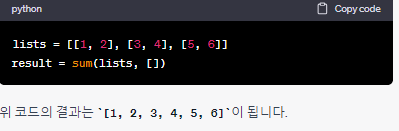

In [42]:
print(sum(df['cleaned_tokens'], []))

['make', 'one', 'film', 'say', "''", "'s", 'make', 'really', 'bad', 'movie', "''", 'like', 'say', 'make', 'really', 'bad', 'movie', 'bad', 'one', 'film', "'s", "'s", 'like', 'film', 'film', 'new', 'york', 'joan', 'barnard', 'elvire', 'audrey', 'barnard', 'john', 'saxon', 'italy', 'etruscan', 'tomb', 'joan', 'italy', 'colleague', 'italy', 'maggot', 'maggot', 'joan', 'drug', 'drug', 'tomb', 'colleague', 'story', 'end', 'new', 'york', 'joan', 'colleague', 'romantic', 'end', 'waste', 'time', 'watch', 'story', 'romantic', 'end', 'elvire', 'audrey', 'john', 'saxon', 'maggot', 'watch', 'etrusco', 'go', 'watch', 'go', 'go', 'waste', 'time', 'etrusco', 'etruscan', 'go', 'film', 'film', "'s", 'go', "'s", 'jump', 'send', "n't", 'jump', 'radio', "n't", 'send', 'reporter', 'fear', 'jump', 'fear', 'radio', 'reporter', "n't", 'radio', "n't", 'go', "n't", 'site', 'movie', 'bad', 'even', 'movie', 'movie', 'make', "'s", 'movie', 'special', 'describe', 'movie', 'movie', 'describe', 'movie', 'jim', 'make'

In [48]:
# 전체 코퍼스의 토큰들을 전부 합하여 단어의 등장 빈도 계산
word_to_idx = {}
i = 0
tokens = sum(df['cleaned_tokens'], [])

# 등장 빈도 계산하기 - Counter 함수 
vocab = Counter(tokens)

# 등장 빈도 순서대로 정렬하기 - most_common()
vocab = vocab.most_common()

for (word, frequency) in vocab :
    i +=1
    word_to_idx[word] = i

In [49]:
# 인코딩 함수 정의
def idx_encoder(tokens, word_to_idx) :
    encoded_idx = [] # 인코딩한 값을 담아줄 리스트
    
    for token in tokens :
        idx = word_to_idx[token]
        encoded_idx.append(idx)
        
    return encoded_idx

### 전체 데이터 프레임 정수 인코딩

In [51]:
df['cleaned_tokens'].apply(lambda x : idx_encoder(x,word_to_idx))

0    [12, 15, 4, 58, 1, 2, 12, 20, 8, 3, 1, 16, 58,...
1                                               [4, 4]
2    [59, 60, 23, 61, 62, 63, 61, 64, 65, 29, 66, 6...
3    [6, 4, 4, 2, 6, 2, 34, 73, 5, 34, 35, 5, 73, 7...
4    [76, 3, 8, 21, 3, 3, 12, 2, 3, 77, 78, 3, 3, 7...
5    [39, 1, 1, 40, 82, 1, 1, 82, 39, 40, 83, 83, 3...
6    [84, 3, 5, 2, 25, 85, 86, 25, 2, 25, 84, 5, 86...
7    [89, 10, 90, 2, 10, 6, 41, 42, 91, 43, 90, 92,...
8    [125, 3, 3, 126, 56, 14, 126, 127, 57, 3, 56, ...
9                 [128, 128, 1, 1, 10, 10, 1, 1, 1, 1]
Name: cleaned_tokens, dtype: object

### 감성분석
- 자연어에 담긴 어조가 긍정적인지, 부정적인지, 중립적인지 확인하는 작업
- 축약형과 기호등을 고려하여 감성 지수를 추출
- 소셜 미디어 텍스트를 분석할때 자주사용

In [52]:
pip install vaderSentiment


                                              0.0/126.0 kB ? eta -:--:--
     -------------------------------------- 126.0/126.0 kB 7.2 MB/s eta 0:00:00


In [53]:
# 라이브러리 로딩
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer=SentimentIntensityAnalyzer()

In [56]:
text1 = "This is a great movie!"
text2 = "This is a terrible movie!"
text3 = "This movie was just okay."

# VADER 감성분석
# 단어, 문장, 여러 문장으로 이루어진 코퍼스도 바로 감성 지수 계산가능
# polarity_scores 메서드 사용 
print(senti_analyzer.polarity_scores(text1))
print(senti_analyzer.polarity_scores(text2))
print(senti_analyzer.polarity_scores(text3))
# neg : 부정 감성 지수
# neu : 중립 감성 지수
# pos : 긍정 감성 지수
# compound : 위 세 지수를 적절하게 조합하여 -1 과 1 사이의 감성지수를 나타냄
# -1에 가까우면 부정적인 의미. 1에 가까우면 긍정적인 의미

{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}
{'neg': 0.531, 'neu': 0.469, 'pos': 0.0, 'compound': -0.5255}
{'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.2263}


In [57]:
df['review']

0    watching time chasers, it obvious that it was ...
1    i saw this film about 20 years ago and remembe...
2    minor spoilers in new york, joan barnard (elvi...
3    i went to see this film with a great deal of e...
4    yes, i agree with everyone on this site this m...
5    jennifer ehle was sparkling in \"pride and pre...
6    amy poehler is a terrific comedian on saturday...
7    a plane carrying employees of a large biotech ...
8    a well made, gritty science fiction movie, it ...
9    incredibly dumb and utterly predictable story ...
Name: review, dtype: object

In [61]:
# vader 감성분석 함수 정의
def vader_sentiment(text):
    senti_analyzer = SentimentIntensityAnalyzer()
    
    # 감성 분석 - polarity_scores 메서드
    senti_score = senti_analyzer.polarity_scores(text)['compound']
    
    return senti_score    

In [64]:
df['vader_sentiment']=df['review'].apply(vader_sentiment)
df[['review', 'vader_sentiment']]

,review,vader_sentiment
0,"watching time chasers, it obvious that it was ...",-0.9095
1,i saw this film about 20 years ago and remembe...,-0.9694
2,"minor spoilers in new york, joan barnard (elvi...",-0.2794
3,i went to see this film with a great deal of e...,-0.9707
4,"yes, i agree with everyone on this site this m...",0.8444
5,"jennifer ehle was sparkling in \""pride and pre...",0.9494
6,amy poehler is a terrific comedian on saturday...,0.8473
7,a plane carrying employees of a large biotech ...,0.9885
8,"a well made, gritty science fiction movie, it ...",0.9887
9,incredibly dumb and utterly predictable story ...,-0.7375


In [66]:
# 감성지수가 가장 낮은 리뷰는?
df['vader_sentiment'].sort_values()

3   -0.9707
1   -0.9694
0   -0.9095
9   -0.7375
2   -0.2794
4    0.8444
6    0.8473
5    0.9494
7    0.9885
8    0.9887
Name: vader_sentiment, dtype: float64

In [67]:
df['review'][3]

"i went to see this film with a great deal of excitement as i was at school with the director, he was even a good friend of mine for a while. but sorry mate, this film stinks. i can only talk about what was wrong with the first half because that's when i walked out and went to the pub for a much needed drink: 1) someone's standing on a balcony about to jump and so you send a helicopter to shine a searchlight on them??? i don't think so - nothing would make them more likely to jump. 2) local radio doesn't send reporters to cover people about to attempt suicide - again for fear of pressuring them into jumping - or for fear of encouraging copy-cat instances. 3) whatever the circumstances, radio reporters don't do live broadcasts from the 10th floor of a tower block. radio cars don't carry leads long enough to connect the microphone and headphones to the transmitter. 4) the stuck in the lift scene was utterly derivative 5) the acting and direction was almost non existent.i could go on, but

In [68]:
df['review'][8]

"a well made, gritty science fiction movie, it could be lost among hundreds of other similar movies, but it has several strong points to keep it near the top. for one, the writing and directing is very solid, and it manages for the most part to avoid many sci-fi cliches, though not all of them. it does a good job of keeping you in suspense, and the landscape and look of the movie will appeal to sci-fi fans. if you're looking for a masterpiece, this isn't it. but if you're looking for good old fashioned post-apoc, gritty future in space sci-fi, with good suspense and special effects, then this is the movie for you. thoroughly enjoyable, and a good ending."

In [69]:
# 영화의 감성 지수 총합은?
df['vader_sentiment'].sum()

0.7518